In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Gerando os dados para as ações
np.random.seed(0)
n_samples =100
symbols = ['AAPL','GOOGLE','MSFT','AMZN','TSLA','FB']
prices = np.random.uniform(50,4000,n_samples)
volume = np.random.randint(100000,500000,n_samples)
market_cap = np.random.uniform(1e10,2e12,n_samples)

In [3]:
data = pd.DataFrame({
    'Simbolo':np.random.choice(symbols,n_samples),
    'Preço':prices,
    'Volume': volume,
    'Capitalização de mercado':market_cap
})

In [4]:
data.head()


,Simbolo,Preço,Volume,Capitalização de mercado
0,FB,2217.813341,452893,8.459500e+11
1,GOOGLE,2874.997997,264610,1.106703e+11
2,AAPL,2430.915335,108286,7.373373e+11
3,FB,2202.288573,471938,4.308967e+10
4,AAPL,1723.436457,204299,4.691772e+11


In [5]:
# Realizando o agrupamento com kmeans
data_n = pd.get_dummies(data,columns=['Simbolo'],drop_first=True)

In [6]:
data_n

,Preço,Volume,Capitalização de mercado,Simbolo_AMZN,Simbolo_FB,Simbolo_GOOGLE,Simbolo_MSFT,Simbolo_TSLA
0,2217.813341,452893,8.459500e+11,False,True,False,False,False
1,2874.997997,264610,1.106703e+11,False,False,True,False,False
2,2430.915335,108286,7.373373e+11,False,False,False,False,False
3,2202.288573,471938,4.308967e+10,False,True,False,False,False
4,1723.436457,204299,4.691772e+11,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,773.605880,182727,1.466071e+12,False,False,False,False,False
96,2366.726092,422953,1.007731e+11,False,True,False,False,False
97,129.424807,233193,4.262225e+11,True,False,False,False,False
98,3324.313115,276425,5.809609e+11,False,False,True,False,False


In [7]:
features = data_n[['Preço','Volume','Capitalização de mercado']]

In [8]:
features

,Preço,Volume,Capitalização de mercado
0,2217.813341,452893,8.459500e+11
1,2874.997997,264610,1.106703e+11
2,2430.915335,108286,7.373373e+11
3,2202.288573,471938,4.308967e+10
4,1723.436457,204299,4.691772e+11
...,...,...,...
95,773.605880,182727,1.466071e+12
96,2366.726092,422953,1.007731e+11
97,129.424807,233193,4.262225e+11
98,3324.313115,276425,5.809609e+11


In [9]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(features)
data_n['Cluster'] = kmeans.labels_

In [ ]:
data_n.head() # Exibindo os dados

,Preço,Volume,Capitalização de mercado,Simbolo_AMZN,Simbolo_FB,Simbolo_GOOGLE,Simbolo_MSFT,Simbolo_TSLA,Cluster
0,2217.813341,452893,8.459500e+11,False,True,False,False,False,2
1,2874.997997,264610,1.106703e+11,False,False,True,False,False,1
2,2430.915335,108286,7.373373e+11,False,False,False,False,False,2
3,2202.288573,471938,4.308967e+10,False,True,False,False,False,1
4,1723.436457,204299,4.691772e+11,False,False,False,False,False,1


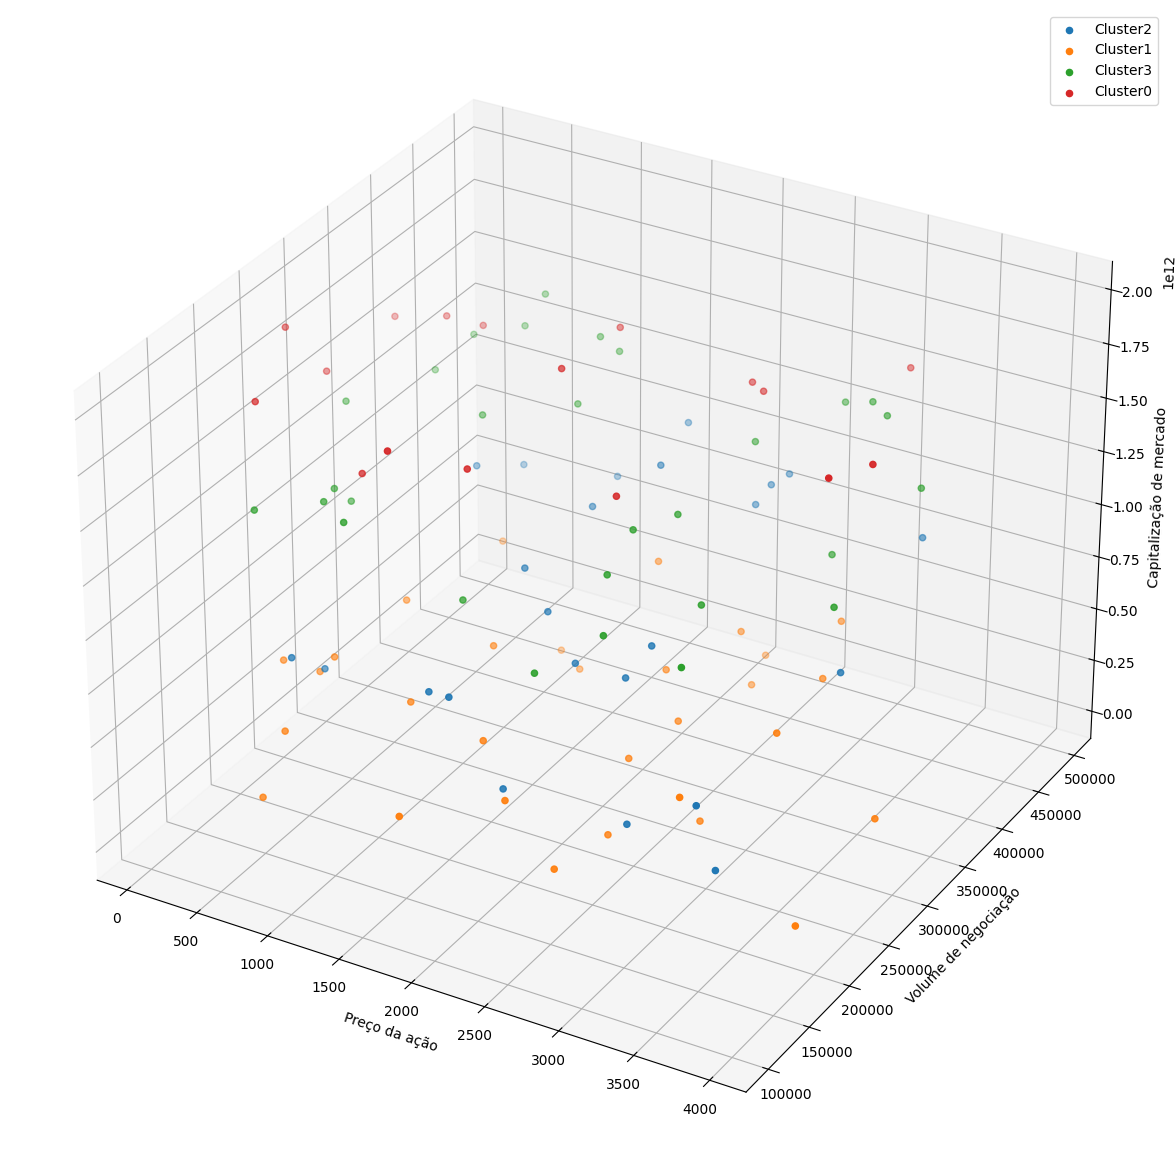

               Preço         Volume  Capitalização de mercado  Simbolo_AMZN  \
Cluster                                                                       
0        1747.820735  279252.647059              1.827009e+12      0.117647   
1        1884.892177  291017.033333              3.244851e+11      0.133333   
2        2117.821374  286968.958333              8.969757e+11      0.208333   
3        1885.039167  301944.517241              1.412423e+12      0.172414   

         Simbolo_FB  Simbolo_GOOGLE  Simbolo_MSFT  Simbolo_TSLA  
Cluster                                                          
0          0.058824        0.235294      0.176471      0.235294  
1          0.100000        0.300000      0.166667      0.166667  
2          0.208333        0.291667      0.041667      0.125000  
3          0.068966        0.068966      0.068966      0.275862  


In [14]:
# Visualizando os grupos no grafico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
for cluster in data_n['Cluster'].unique():
    cluster_data =data_n[data_n['Cluster']==cluster]
    ax.scatter(cluster_data['Preço'],cluster_data['Volume'],cluster_data['Capitalização de mercado'],
               label=f'Cluster{cluster}')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Volume de negociação')
ax.set_zlabel('Capitalização de mercado')
plt.legend()
plt.show()
cluster_means = data_n.groupby('Cluster').mean()
print(cluster_means)
    

<Axes: xlabel='Simbolo', ylabel='Preço'>

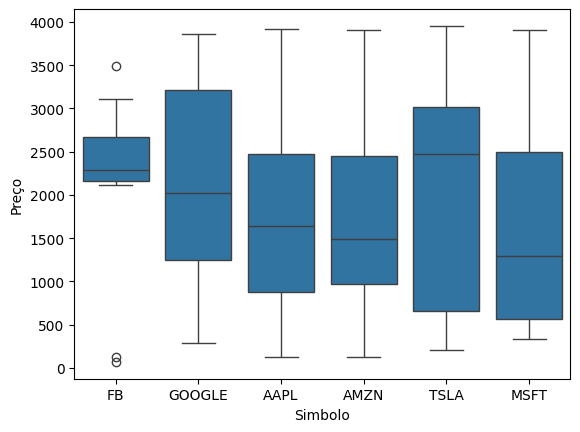

In [16]:
# box plot
sns.boxplot(x=data['Simbolo'],y=data['Preço'])